In [4]:
from hwo_disra.api.notebook_api import DisraNBApi
from hwo_disra.Types import ScienceValue, Range, Time, DiscretePoints

api = DisraNBApi.get_instance()

bins = {'a': 10, 'b': 20, 'c': 30, 'd': 40}

def compute_yield(sample, x, y):
  return x + y * sample

yielder = api.yieldinator(name = 'test',
                          thresholds = {ScienceValue.ENABLING: 25},
                          variables = {'sample': DiscretePoints.from_dict(bins, 'sample'),
                                       'x': Range(0,  10), 'y': Range(5,  15)},
                          yield_function = compute_yield)

yield_results = api.evaluate(yielder)

In [5]:
def compute_time(eac, yield_value, sample, x, y) -> Time:
  return yield_value / eac.telescope.effective_aperture.value ** 2

timer = api.timeinator(yielder, timeinate=compute_time)
results = api.evaluate(timer, register=True)

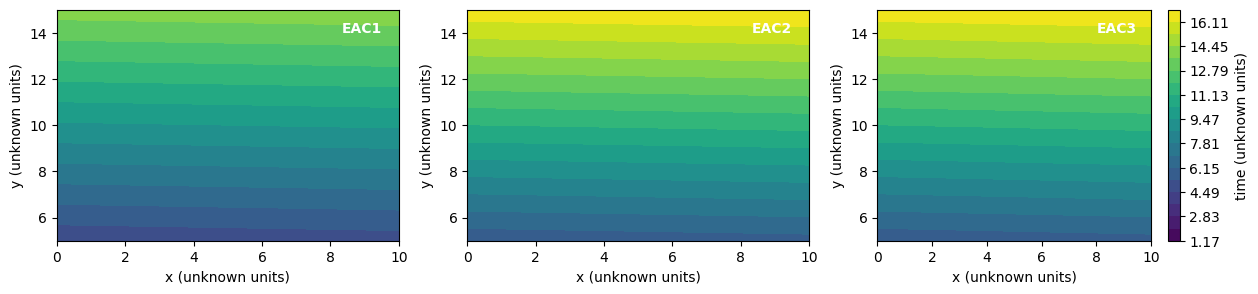

In [6]:
api.plotinator().contour_plot([e.sample_points for e in results], 'x', 'y', 'time',
                              titles=[e.eac for e in results],
                              contour_levels=[0.5, 1.0, 2.0, 2.5, 3.0, 3.5],
                              figsize=(15,3))